In [98]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
import matplotlib.ticker as mticker
from matplotlib.table import Table

In [99]:
def plot_world_production_vs_consumption(data):
    """
    Plots a line chart for World Production and World Consumption over time,
    separating real data (up to 2024) and projections (2025 and beyond).

    Parameters:
        data (pd.DataFrame): DataFrame containing the data to plot. Must include
                             'Date', 'World Production', and 'World Consumption'.
                             
    """
    
    # Paths to your Montserrat font files
    font_path = './assets/Montserrat/static/Montserrat-Regular.ttf'
    font_path_bold = './assets/Montserrat/static/Montserrat-Bold.ttf'

    # Register the font properties with sizes
    prop = fm.FontProperties(fname=font_path, size=12)
    prop_bold = fm.FontProperties(fname=font_path_bold, size=16)
    
    # Ensure 'Date' is in datetime format
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Split the data into real and projection
    real_data = data[data['Date'] < '2025-01-01']
    projection_data = data[data['Date'] >= '2025-01-01']

    # Plot the data
    plt.figure(figsize=(12, 7))

    # Plot real data
    plt.plot(real_data['Date'], real_data['World Production'], label='World Production (Real)', color='blue', marker='o', linestyle='-', alpha=1.0)
    plt.plot(real_data['Date'], real_data['World Consumption'], label='World Consumption (Real)', color='orange', marker='o', linestyle='-', alpha=1.0)

    # Plot projection data with reduced opacity and specific colors
    plt.plot(projection_data['Date'], projection_data['World Production'], color='blue', marker='o', linestyle='-', alpha=0.4)
    plt.plot(projection_data['Date'], projection_data['World Consumption'], color='orange', marker='o', linestyle='-', alpha=0.4)

    # Add a horizontal line to separate real data and projection
    plt.axvline(x=pd.to_datetime('2024-11-20'), color='black', linestyle='--', linewidth=1, label='')

    # Add titles and labels with custom fonts
    plt.title('World Liquid Fuels Production & Consumption Balance', fontproperties=prop_bold)
    plt.xlabel('Date', fontproperties=prop)
    plt.ylabel('Volume (in million barrels/day)', fontproperties=prop)
    
    # Use a single legend with custom font
    plt.legend(loc='upper left', prop=prop)
    
    plt.grid(True, linestyle='--', alpha=0.7)

    # Save the plot as an image
    output_path = "../report/images/world_production_vs_consumption.png"
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()
    
def plot_stock_change(data):
    """
    Plots a bar chart for Stock Change, with negative values in red and positive values in yellow.

    Parameters:
        data (pd.DataFrame): DataFrame containing the data to plot. Must include
                             'Quarter' and 'Stock Change'.
    """
    
    # Paths to your Montserrat font files
    font_path = './assets/Montserrat/static/Montserrat-Regular.ttf'
    font_path_bold = './assets/Montserrat/static/Montserrat-Bold.ttf'

    # Register the font properties with sizes
    prop = fm.FontProperties(fname=font_path, size=12)
    prop_bold = fm.FontProperties(fname=font_path_bold, size=16)
    
    # Ensure 'Quarter' and 'Stock Change' columns exist
    if 'Quarter' not in data.columns or 'Stock Change' not in data.columns:
        raise ValueError("DataFrame must contain 'Quarter' and 'Stock Change' columns.")

    # Bar colors based on Stock Change values
    colors = ['red' if val < 0 else 'gold' for val in data['Stock Change']]

    # Plot the bar chart
    plt.figure(figsize=(12, 7))
    plt.bar(data['Quarter'], data['Stock Change'], color=colors)

    # Add titles and labels with custom fonts
    plt.title('Implied Stock Build and Draw', fontproperties=prop_bold)
    plt.xlabel('Year and Quarter', fontproperties=prop)
    plt.ylabel('Million barrels per day', fontproperties=prop)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, fontproperties=prop)

    # Add gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save the plot as an image
    output_path = "../report/images/stock_change_bar_chart.png"
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()


In [100]:
# Import data

# Define file path
file_path = "../data/raw/chart-gallery.xlsx"

# Import sheet 2 (indexing starts from 0, so sheet_name=1 refers to the second sheet)
data = pd.read_excel(file_path, sheet_name=2, skiprows=26, usecols="A:K")

# Drop columns with all NA values
data = data.dropna(axis=1, how='all')

data.columns = [
    "Quarter", "Year", "Sub-Quarter", "Date",
    "World Production", "World Consumption",
    "Stock Change", "Draw", "Build"
]

# Drop rows with non-numeric values in 'World Production' or 'World Consumption'
data = data[pd.to_numeric(data["World Production"], errors='coerce').notna()]

# Export data to processed folder
processed_file_path = "../data/processed/world_production_vs_consumption.csv"
data.to_csv(processed_file_path, index=False)

data['Stock Change'] = data['Stock Change']*-1


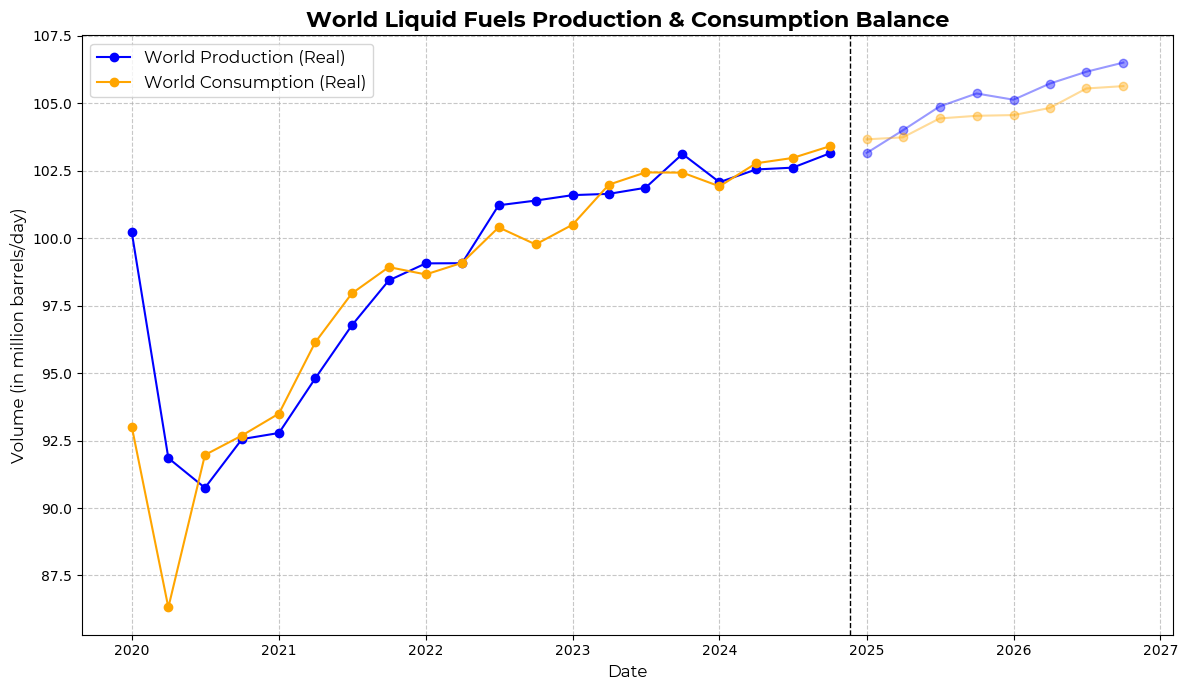

In [101]:
# Example usage of the plotting function
plot_world_production_vs_consumption(data)

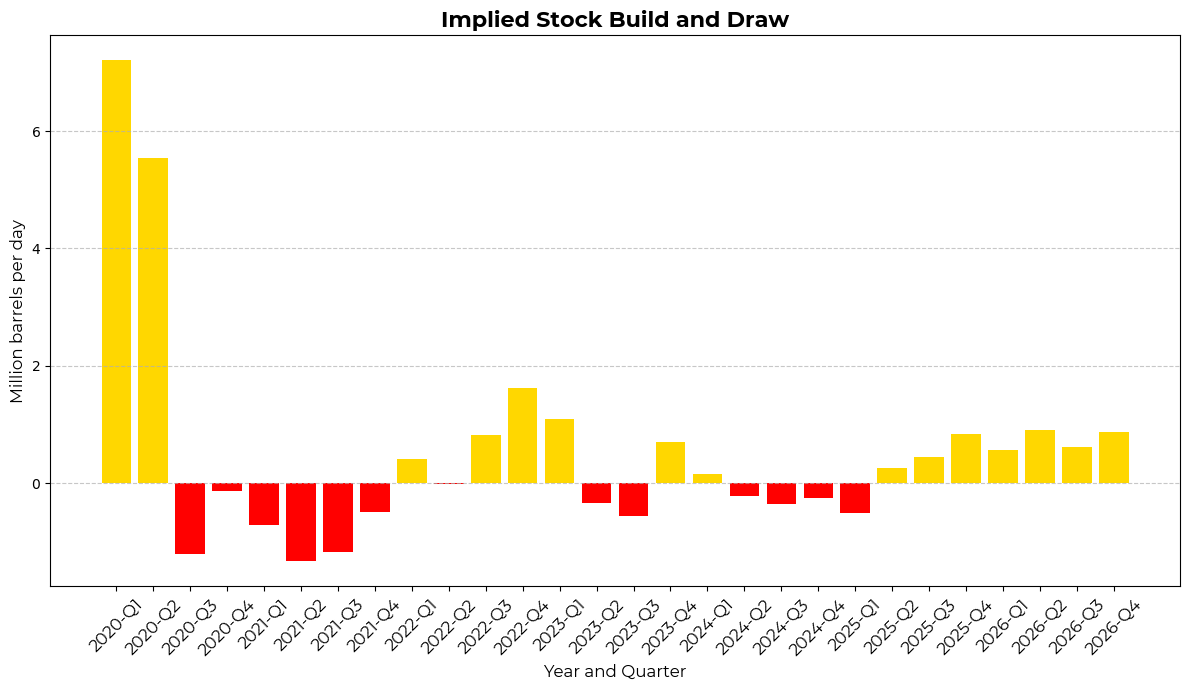

In [102]:
plot_stock_change(data)